In [34]:
import numpy as np
import pandas as pd
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline



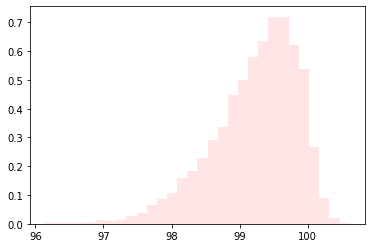

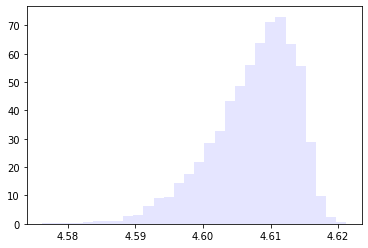

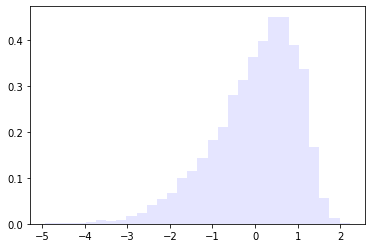

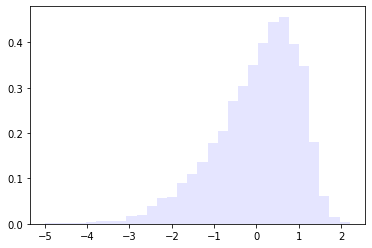

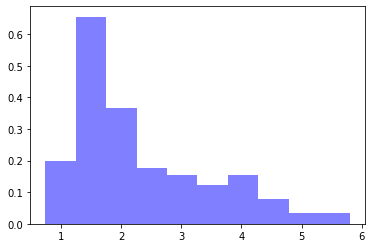

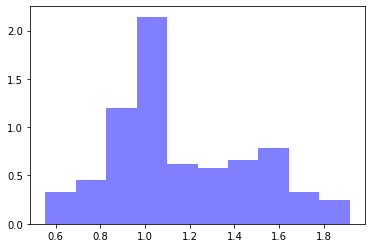

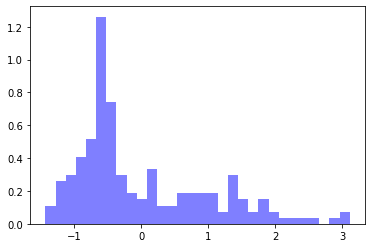

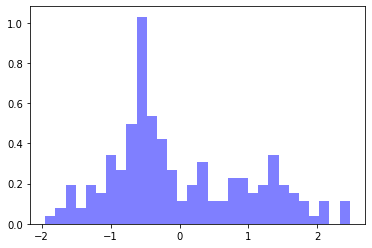

In [3]:
numValues = 10000
maxValue = 100
skewness = -5   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

# random = random - min(random)      #Shift the set so the minimum value is equal to zero.
# random = random / max(random)      #Standadize all the vlues between 0 and 1. 
# random = random * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(random,30,density=True, color = 'red', alpha=0.1)
plt.show()

logtransformed = np.log1p(random)
plt.hist(logtransformed,30,density=True, color = 'blue', alpha=0.1)
plt.show()



scaler = StandardScaler()
scaled_data = scaler.fit_transform(pd.DataFrame(random))
plt.hist(scaled_data,30,density=True, color = 'blue', alpha=0.1)
plt.show()



scaler = StandardScaler()
scaled_data = scaler.fit_transform(pd.DataFrame(logtransformed))
plt.hist(scaled_data,30,density=True, color = 'blue', alpha=0.1)
plt.show()


from sklearn.datasets import load_wine
col = load_wine().feature_names
wine_df = pd.DataFrame(load_wine().data,columns = col)
wine_df.head(5)

malic_acid = wine_df['malic_acid']
plt.hist(malic_acid,density=True, color = 'blue', alpha=0.5)
plt.show()

log_transformed = np.log1p(malic_acid)
plt.hist(log_transformed, density=True, color = 'blue', alpha=0.5)
plt.show()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pd.DataFrame(malic_acid))
plt.hist(scaled_data,30,density=True, color = 'blue', alpha=0.5)
plt.show()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(pd.DataFrame(log_transformed))
plt.hist(scaled_data,30,density=True, color = 'blue', alpha=0.5)
plt.show()


/var/folders/31/fsv6j6b57ds7zhss6nz0s1t80000gn/T/ipykernel_3527/2660881717.py:49: RuntimeWarning: invalid value encountered in log1p
  scaled_log = np.log1p(scaled_data)


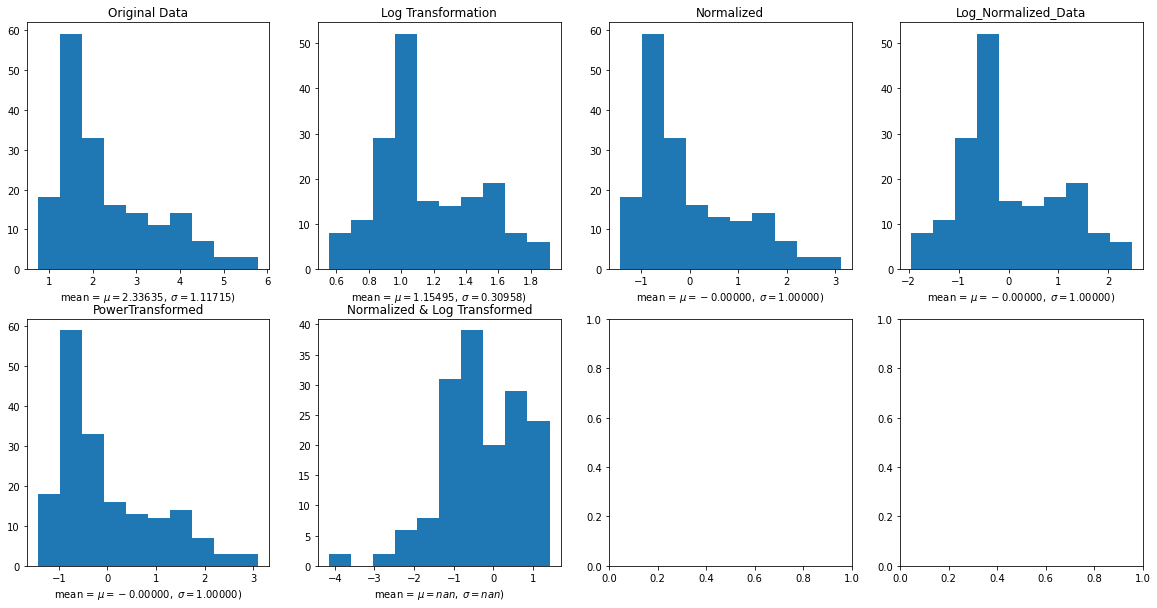

In [47]:
col = load_wine().feature_names
wine_df = pd.DataFrame(load_wine().data,columns = col)
wine_df.head(5)

numValues = 10000
maxValue = 100
skewness = -100
malic_acid = wine_df['malic_acid']

random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function
data = malic_acid

fig,ax = plt.subplots(ncols=4,nrows=2)
fig.set_size_inches(20,10)


ax[0,0].hist(data)
ax[0,0].set_title('Original Data')
ax[0,0].set_xlabel(f'mean = $\mu={data.mean():.5f}, \; \sigma={data.std():.5f}$)')   


logtransformed = np.log1p(data)
ax[0,1].hist(logtransformed)
ax[0,1].set_title('Log Transformation')
ax[0,1].set_xlabel(f'mean = $\mu={logtransformed.mean():.5f}, \; \sigma={logtransformed.std():.5f}$)')   

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pd.DataFrame(data))
ax[0,2].hist(scaled_data)
ax[0,2].set_title('Normalized')
ax[0,2].set_xlabel(f'mean = $\mu={scaled_data.mean():.5f}, \; \sigma={scaled_data.std():.5f}$)')   


scaler = StandardScaler()
# scaler.fit(pd.DataFrame(data))
# logscaled_data = scaler.transform(pd.DataFrame(logtransformed))
logscaled_data = scaler.fit_transform(pd.DataFrame(logtransformed))
ax[0,3].hist(logscaled_data)
ax[0,3].set_title('Log_Normalized_Data')
ax[0,3].set_xlabel(f'mean = $\mu={logscaled_data.mean():.5f}, \; \sigma={logscaled_data.std():.5f}$)')   

power = PowerTransformer()
power_data = power.fit_transform(pd.DataFrame(data))
ax[1,0].hist(scaled_data)
ax[1,0].set_title('PowerTransformed')
ax[1,0].set_xlabel(f'mean = $\mu={power_data.mean():.5f}, \; \sigma={power_data.std():.5f}$)')   


scaled_log = np.log1p(scaled_data)
ax[1,1].hist(scaled_log)
ax[1,1].set_title('Normalized & Log Transformed')
ax[1,1].set_xlabel(f'mean = $\mu={scaled_log.mean():.5f}, \; \sigma={scaled_log.std():.5f}$)')   






plt.show()


## [About Feature Scaling and Normalization](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization)

[한국링크](https://heeya-stupidbutstudying.tistory.com/32)

**Examples of algorithms where feature scaling matters are:**

- **K-Nearest Neighbors(KNN)** with an Euclidean distance measure if want all features to contribute equally
**K-Means (see k-nearest neighbors)**
- **Logistic Regression, SVMs, perceptrons, neural networks etc.** if you are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others
- **Linear Discriminant Analysis(LDA), Principal Component Analysis(PCA), Kernel Principal Component Analysis** since you want to find directions of maximizing the variance (under the constraints that those directions/eigenvectors/principal components are orthogonal); you want to have features on the same scale since you’d emphasize variables on “larger measurement scales” more. There are many more cases than I can possibly list here … I always recommend you to think about the algorithm and what it’s doing, and then it typically becomes obvious whether we want to scale your features or not.

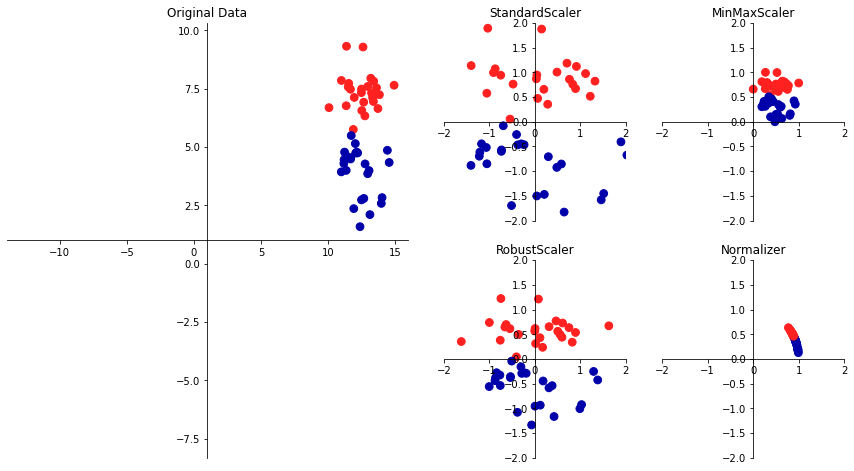

In [37]:
import mglearn
mglearn.plots.plot_scaling()

In [45]:
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [66]:
df_log = df[['Alcohol', 'Malic acid']].apply(np.log1p)

print('Mean after Log Transformation:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_log['Alcohol'].mean(), df_log['Malic acid'].mean()))
print('\nStandard Deviation after Log Transformation:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_log['Alcohol'].std(), df_log['Malic acid'].std()))


Mean after Log Transformation:
Alcohol=2.64, Malic acid=1.15

Standard Deviation after Log Transformation:
Alcohol=0.06, Malic acid=0.31


In [64]:
std_scale = StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [67]:
minmax_scale = MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


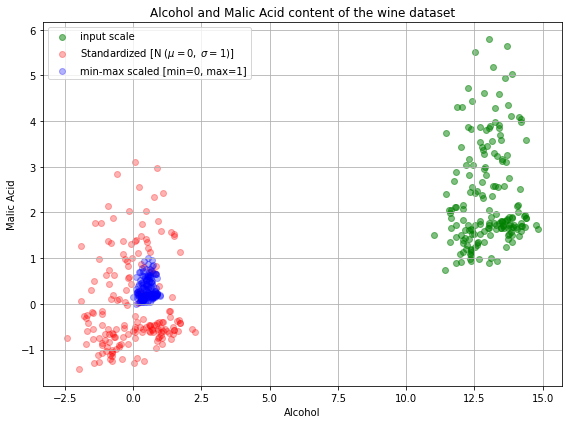

In [72]:
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardized [N ($\mu=0, \; \sigma=1$)]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

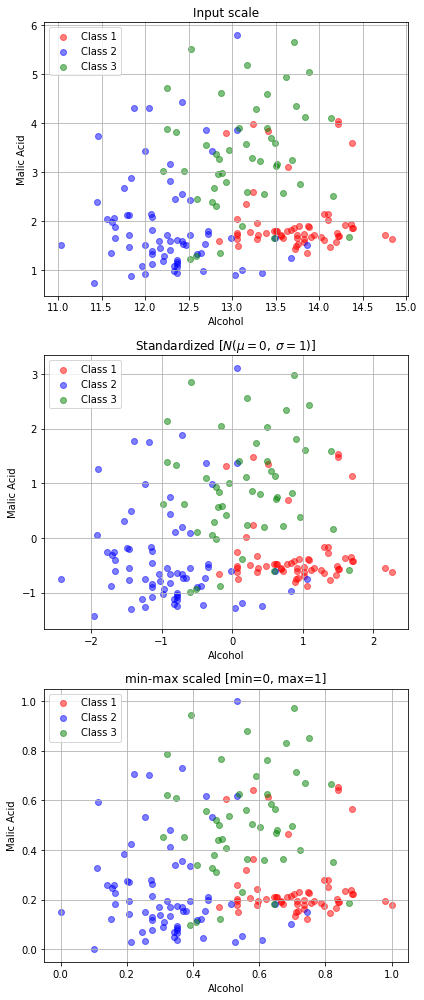

In [74]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
               ('Input scale',
                'Standardized [$N  (\mu=0, \; \sigma=1)$]',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Class label'].values == i, 0],
                  d[df['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()

plt.show()


### PCA

In [87]:

X_wine = df.values[:,1:]
y_wine = df.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
    test_size=0.30, random_state=12345)


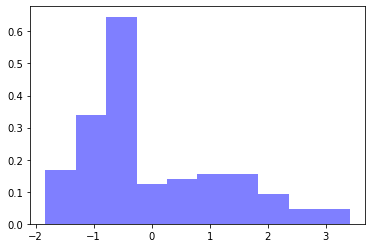

In [94]:
plt.hist(X_train[:,0],density=True, color = 'blue', alpha=0.5)
plt.show()

In [88]:
std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [89]:

# on non-standardized data
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


# om standardized data
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

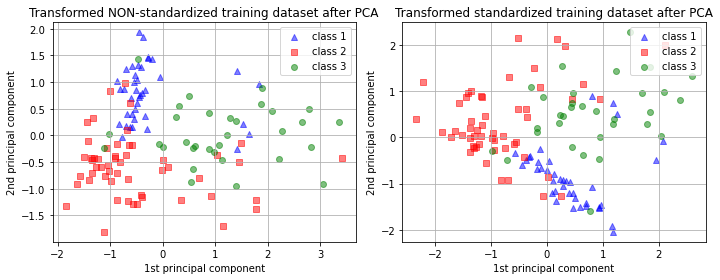

In [90]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    

for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()  